In [9]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline

Image path:sample.jpg


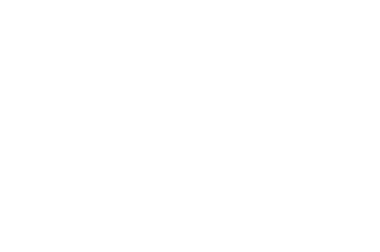

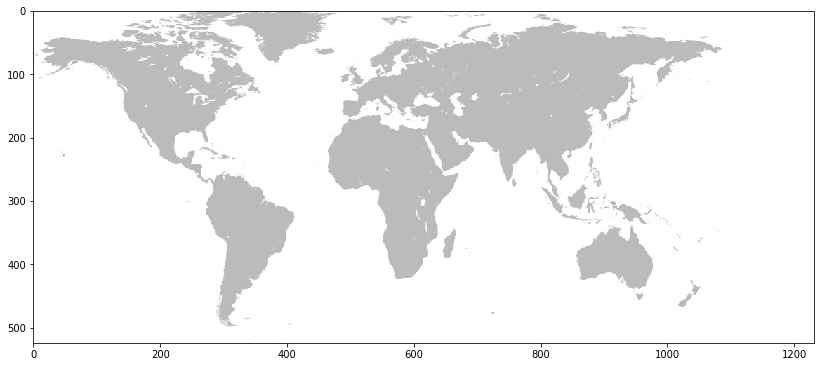

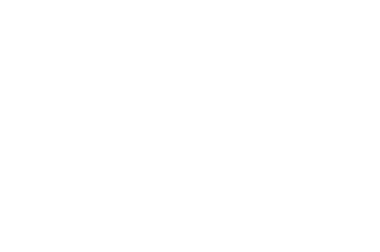

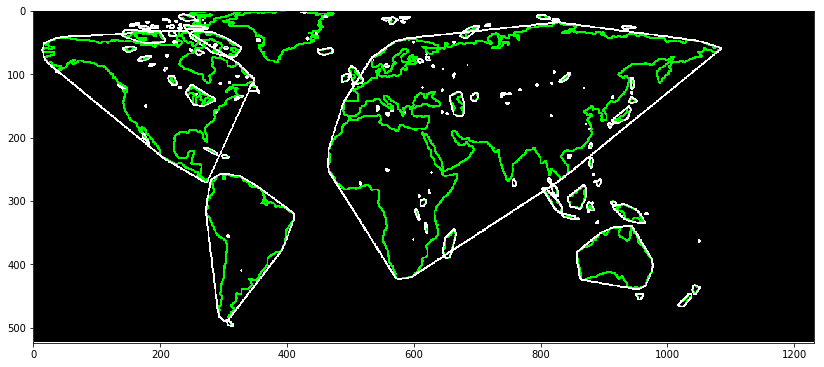

In [16]:
file_path = input("Image path:")
# read image
src = cv2.imread(file_path, 1)

# show source image
plt.axis('off')
plt.figure(figsize=[14,8])
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
# show will output at the backend plt immediately
plt.show()

# convert image to gray scale
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# blur the image
blur = cv2.blur(gray, (3, 3))

# binary thresholding of the image
ret, thresh = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY)

# find contours
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, \
        cv2.CHAIN_APPROX_SIMPLE)

# create hull array for convexHull points
hull = []

# calculate points for each contour
for i in range(len(contours)):
    hull.append(cv2.convexHull(contours[i], False))

# create an empty black image
drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)

# draw contours and hull points
for i in range(len(contours)):
    color_contours = (0, 255, 0) # color for contours
    color = (255, 255, 255) # color for convex hull
    # draw contours
    cv2.drawContours(drawing, contours, i, color_contours, 2, 8, hierarchy)
    # draw convex hull
    cv2.drawContours(drawing, hull, i, color, 2, 8)


plt.axis('off')
plt.figure(figsize=[14,8])
plt.imshow(drawing)
plt.show()
